In [1]:
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import glob
import os
import scipy.io
import numpy as np
import pandas as pd
import math
from sklearn.cluster import SpectralClustering

In [2]:
trainGroundTruth = "C:\\Users\\Ahmad Beltagy\\Desktop\College\\term 8\\Pattern Recognition\\Assignments\\Data Set - assignment 2\\BSR\\BSDS500\\data\\groundTruth\\test"
trainDataPath = "C:\\Users\\Ahmad Beltagy\\Desktop\\College\\term 8\\Pattern Recognition\\Assignments\\Data Set - assignment 2\\BSR\\BSDS500\\data\\images\\test"

def SegmentImages():
    
    
    for filename in glob.glob(trainDataPath+"\\"+"*.jpg"): 
        #reading files from training data
        
        img = mpimg.imread(filename,format="jpg")
        
        rows = len(img)
        cols = len(img[0])
    
        labels , clusters = Kmeans(img,3)
        print("Image After Clustering ")
        plt.imshow(labels)
        plt.show()
        
        labelsAs1D = np.reshape(labels,154401)
        
        #print(f" {labelsAs1D}")

        
        
        
        #reading files from ground truth
        filename_w_ext = os.path.basename(filename)
        imageName, file_extension = os.path.splitext(filename_w_ext) 
        mat = scipy.io.loadmat(trainGroundTruth+"\\"+imageName+".mat")
        
        
        
        numberOfImages = len(mat['groundTruth'][0])
        fig , ax = plt.subplots(1,numberOfImages+1)
        ax[0].imshow(img)
        
        for k in range(0,numberOfImages,1):
            groundImage = mat['groundTruth'][0][k][0][0][0]
            ax[k+1].imshow(groundImage)
            
        plt.show()
        
        for i in range(0,numberOfImages,1):
            groundImage = mat['groundTruth'][0][i][0][0][0]
            groundTruthAs1D = np.reshape(groundImage,154401)
            matrix = pd.crosstab(labelsAs1D,groundTruthAs1D, rownames=['labels'], colnames=['img'])
            #print(matrix)
            #converting DataFrame to Numpy Array
            matrix = matrix.values
            fScore = getFScore(matrix)
            conditionalEntropy = getConditionalEntropy(matrix)
            print(f"Scores against groundTruth image {i}:")
            print("fScore is ",fScore)
            print("conditionalEntropy ",conditionalEntropy)
            print("\n\n")
            
        
    

In [3]:
def Kmeans(arr, K):

    centroids = generateCentroids(arr,K)
    while(True):
        labels = np.zeros((len(arr),len(arr[0])))
        labels, newMeans = getLabels(arr,labels,len(arr),len(arr[0]),K,centroids)
        newMeans = np.array(newMeans)
        
        
        if isEqual(newMeans,centroids):
            break;
        else:
            centroids = newMeans
    
    return labels , newMeans
    

In [4]:
def getFScore(matrix):
    fScore = 0
    for i in range(0,len(matrix),1):
        rowSum = sum(matrix[i])
        idx = matrix[i].argsort()[::-1]
        #max element
        maxElement = matrix[i][idx[0]]
        sumArray = np.sum(matrix,axis=0)
        colSum = sumArray[idx[0]]
        score = ((2*maxElement) /(rowSum+colSum))
        fScore = fScore +score
    return (1/len(matrix))*fScore
        
    

In [ ]:
def getConditionalEntropy(matrix):
    entropy = 0
    for i in range(0,len(matrix),1):
        rowSum = sum(matrix[i])
        classEntropy = 0
        for j in range(0,len(matrix[0]),1):
            if(matrix[i][j] == 0):
                classEntropy = classEntropy + 0
            else:
                element = (matrix[i][j]/rowSum) * math.log2(matrix[i][j]/rowSum)
                classEntropy = classEntropy - element
        temp = (rowSum / 154401)*classEntropy
        entropy = entropy + temp
    
    return entropy
        

In [ ]:
def assignLabels(pixel,K,centroids):
    min = 1000000
    index = -1
    for i in range(0,K,1):
        
        temp = eucl_dist(pixel,centroids[i])
        if temp < min:
            min = temp
            index = i
            
    return index

In [ ]:
def getLabels(arr,labels,rows,columns,K,centroids):
    
    accumlatorClustering = intializeArray(len(centroids))
    accumlatorClustering = np.array(accumlatorClustering)
    
    counters  = []
    newMeans  = []
    
    for k in range(0,len(centroids),1):
        counters.append(0)
        newMeans.append(0)
        
   
    counters = np.array(counters)
    
    for i in range(0,rows,1):
        for j in range(0,columns,1):
            tempArray = np.array([arr[i][j][0],arr[i][j][1],arr[i][j][2],i,j])
            labels[i][j] = assignLabels(tempArray,K,centroids)
            accumlatorClustering[int(labels[i][j])] = accumlatorClustering[int(labels[i][j])] + tempArray
            counters[int(labels[i][j])] = counters[int(labels[i][j])] + 1
            
    for n in range(0,len(centroids),1):
        if(counters[n] == 0 ):
            newMeans[n] = accumlatorClustering[n]
        else:
            newMeans[n] = accumlatorClustering[n] // counters[n]
        
        
            
    return labels,newMeans

In [ ]:
def generateCentroids(arr,K):
    centroids = []
    for i in range(0,K,1):
        centroids.append(randomizePoints(arr))
        
    centroids = np.array(centroids)
    return centroids

In [ ]:
def randomizePoints(arr):
    x = np.random.randint(0,len(arr))
    y = np.random.randint(0,len(arr[0]))
    R = arr[x][y][0]
    G = arr[x][y][1]
    B = arr[x][y][2]
    randomArray = np.array([R,G,B,x,y])
   
    return randomArray
    

In [ ]:
def eucl_dist(a, b):
    a = a.astype(float)
    b = b.astype(float)
    return np.linalg.norm(a - b)


In [ ]:
def isEqual(arr1,arr2):
    flag = 1

    for i in range(0, len(arr1), 1):
        for j in range(0, 5, 1):
            if arr1[i][j] != arr2[i][j]:
                flag = 0
                return flag
    return flag

In [ ]:
def intializeArray(size):
    
    arr = []
    for i in range (0,size,1):
        new = []
        for j in range (0, 5):
            new.append(0)
        arr.append(new)
    return arr
            
    

Image After Clustering 


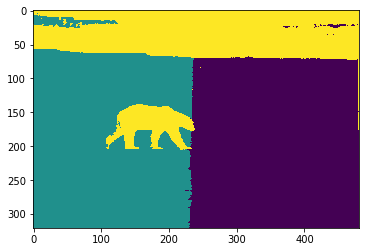

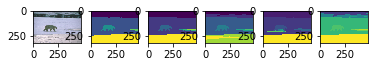

Scores against groundTruth image 0:
fScore is  0.6648445742300578
conditionalEntropy  1.0290832239594676



Scores against groundTruth image 1:
fScore is  0.6595188561794254
conditionalEntropy  1.111408992474623



Scores against groundTruth image 2:
fScore is  0.5587248105547795
conditionalEntropy  1.441841246454692



Scores against groundTruth image 3:
fScore is  0.6334438415226806
conditionalEntropy  1.2941073180804965



Scores against groundTruth image 4:
fScore is  0.540932426021242
conditionalEntropy  1.513447462475587



Image After Clustering 


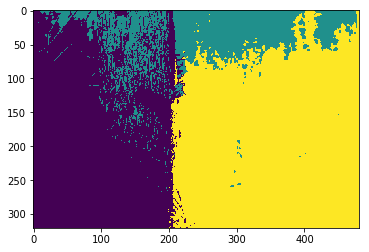

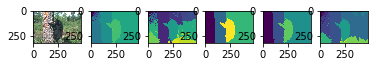

Scores against groundTruth image 0:
fScore is  0.5529824490856867
conditionalEntropy  1.2298065662050675



Scores against groundTruth image 1:
fScore is  0.46413233904338513
conditionalEntropy  2.5639730451742344



Scores against groundTruth image 2:
fScore is  0.5850591569546176
conditionalEntropy  1.044433814870655



Scores against groundTruth image 3:
fScore is  0.5892850867743246
conditionalEntropy  1.0484331468629176



Scores against groundTruth image 4:
fScore is  0.5027317025997912
conditionalEntropy  1.8404439237126569



Image After Clustering 


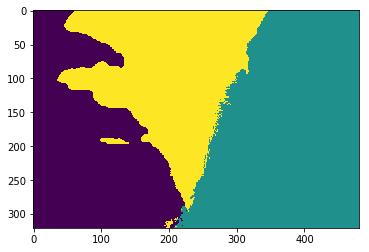

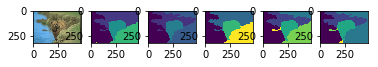

Scores against groundTruth image 0:
fScore is  0.7672713807440924
conditionalEntropy  1.0260958180075133



Scores against groundTruth image 1:
fScore is  0.7912295489859289
conditionalEntropy  0.9829539984447868



Scores against groundTruth image 2:
fScore is  0.7720539913790956
conditionalEntropy  0.9408688687359812



Scores against groundTruth image 3:
fScore is  0.75758773056177
conditionalEntropy  1.2452040687993295



Scores against groundTruth image 4:
fScore is  0.7845528693944517
conditionalEntropy  1.0310461032348133



Image After Clustering 


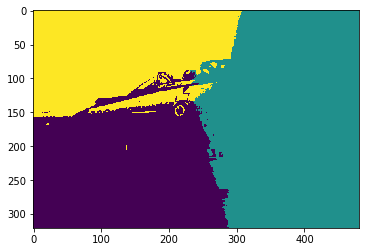

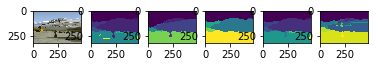

Scores against groundTruth image 0:
fScore is  0.6033981126882231
conditionalEntropy  1.5424917463999959



Scores against groundTruth image 1:
fScore is  0.6238904874607971
conditionalEntropy  1.4052802035880623



Scores against groundTruth image 2:
fScore is  0.6140750492101438
conditionalEntropy  1.3482822142522504



Scores against groundTruth image 3:
fScore is  0.6077834153464887
conditionalEntropy  1.5077920885850475



Scores against groundTruth image 4:
fScore is  0.5901069320197092
conditionalEntropy  1.757896561160727



Image After Clustering 


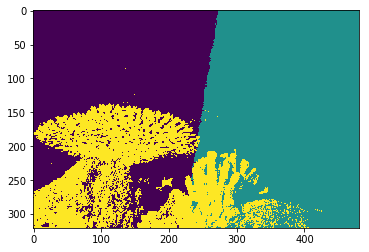

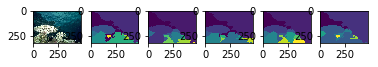

Scores against groundTruth image 0:
fScore is  0.6299422985263236
conditionalEntropy  1.3865576730295859



Scores against groundTruth image 1:
fScore is  0.686655012061383
conditionalEntropy  1.4614032091748754



Scores against groundTruth image 2:
fScore is  0.6114098393495527
conditionalEntropy  1.555985202897066



Scores against groundTruth image 3:
fScore is  0.6108440447240155
conditionalEntropy  1.6476241031772316



Scores against groundTruth image 4:
fScore is  0.7259044438813552
conditionalEntropy  1.0991078042645932



Image After Clustering 


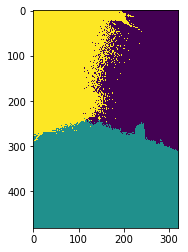

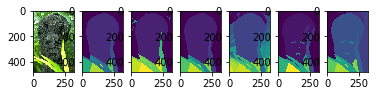

Scores against groundTruth image 0:
fScore is  0.39070376001783935
conditionalEntropy  1.7370324940426645



Scores against groundTruth image 1:
fScore is  0.39142326955738166
conditionalEntropy  1.796614173972598



Scores against groundTruth image 2:
fScore is  0.3891709478839275
conditionalEntropy  1.8035667471385906



Scores against groundTruth image 3:
fScore is  0.3910102412843742
conditionalEntropy  2.8310750498090336



Scores against groundTruth image 4:
fScore is  0.3771324387504891
conditionalEntropy  1.9382205701623678



Scores against groundTruth image 5:
fScore is  0.3878845350291271
conditionalEntropy  2.0888651289904345



Image After Clustering 


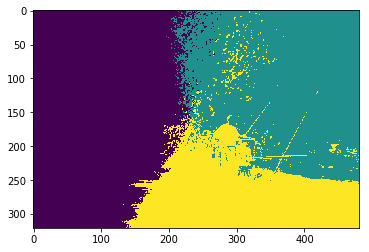

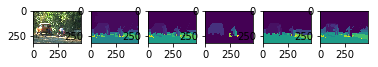

Scores against groundTruth image 0:
fScore is  0.5503065054001606
conditionalEntropy  1.9322495974074632



Scores against groundTruth image 1:
fScore is  0.571733530381018
conditionalEntropy  1.7090760824518174



Scores against groundTruth image 2:
fScore is  0.4771905054654384
conditionalEntropy  0.5396000787013879



Scores against groundTruth image 3:
fScore is  0.567661449152325
conditionalEntropy  1.5239108688799843



Scores against groundTruth image 4:
fScore is  0.5652967244905958
conditionalEntropy  2.0287942789602083





In [ ]:
SegmentImages()